<a href="https://www.kaggle.com/chasset/happywhale-introduction?scriptVersionId=89585721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We can have a first look at the [data](https://www.kaggle.com/c/happy-whale-and-dolphin/data) using the data explorer of Kaggle. We can see that images have different qualities ranging from a dorsal fin to a distant view of the back of the mammal.

Let’s have a more complete view. First add the data through the Kaggle UI. They are afterwards located in */kaggle/input/happy-whale-and-dolphin* folder.

In [1]:
!ls -l /kaggle/input/happy-whale-and-dolphin

total 4668
-rw-r--r-- 1 nobody nogroup 2404234 Feb  1 17:04 sample_submission.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 17:06 test_images
-rw-r--r-- 1 nobody nogroup 2371769 Feb  1 17:06 train.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 17:09 train_images


# Data loading

Let’s load the images metadata described in `train.csv` file. 

We can notice that our train data describes 51 033 images with one ID field for the photography filename and 2 others fields. The latter describe the animal specy and which individual it is.


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/happy-whale-and-dolphin/train.csv")
df

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392
...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e


# Data quality

## Field `species`

In the taxonomy [dataset](https://www.kaggle.com/chasset/happywhalespeciesclassification), authors propose to correct the field `species`.

In [3]:
df.loc[df.species == 'bottlenose_dolpin', 'species'] = 'bottlenose_dolphin'
df.loc[df.species == 'kiler_whale', 'species'] = 'killer_whale'
df.loc[df.species == 'long_finned_pilot_whale', 'species'] = 'pilot_whale'
df.loc[df.species == 'globis', 'species'] = 'pilot_whale'
df


,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392
...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e


In [4]:
df.groupby(['species']).count().sort_values(['species']).shape

(26, 2)

In [5]:
taxonomy = pd.read_csv("/kaggle/input/happywhalespeciesclassification/species.csv").set_index('specy_id').drop(columns = ['wikipedia','image','size'])
taxonomy

,infraorder,family,genus,specy
specy_id,,,,
bottlenose_dolphin,Cetacea,Delphinidae,tursiops,truncatus/aduncus
beluga,Cetacea,Monodontidae,Delphinapterus,leucas
humpback_whale,Cetacea,Balaenopteridae,Megaptera,novaeangliae
blue_whale,Cetacea,Balaenopteridae,Balaenoptera,musculus
false_killer_whale,Cetacea,Delphinidae,Pseudorca,crassidens
dusky_dolphin,Cetacea,Delphinidae,Lagenorhynchus,obscurus
spinner_dolphin,Cetacea,Delphinidae,Stenella,longirostris
melon_headed_whale,Cetacea,Delphinidae,Peponocephala,electra
minke_whale,Cetacea,Balaenopteridae,Balaenoptera,acutorostrata/bonaerensis


## Data bias

### Around individuals

The 51 033 pictures describe 15 887 individuals. The distribution is very skewed:

- 75% of individuals have only one or two pictures
- 400 pictures are dedicated to only one individual

In [6]:
individuals = df.drop(columns = ['species']).groupby(['individual_id']).count().rename(columns = { 'image': 'images_count'})
individuals

,images_count
individual_id,
0013f1f5f2f0,1
001618e0a31e,1
0018a0f40586,1
00191b9a2f6f,1
001a09e48b2d,4
...,...
fff35b58c591,1
fff591b41cce,4
fffb11ff4575,4


In [7]:
individuals.describe()

,images_count
count,15587.000000
mean,3.274075
std,9.242430
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,400.000000


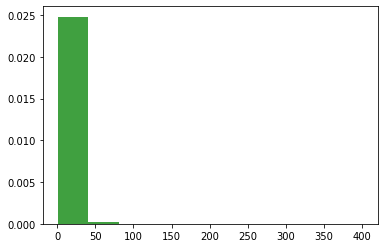

In [8]:
from matplotlib import pyplot as plt
plt.hist(individuals.images_count, density=True, facecolor='g', alpha=0.75)
plt.show()

### Around species

The 51 887 images describe 30 species. Again, the distribution is skewed. Frasiers dolphin specy is descibed by only 14 images, while Bottle nose dolphin (9664), Beluga (7443) and Humpback whale (7392) are over represented.

In [9]:
species = df.drop(columns = ['individual_id']).groupby(['species']).count().rename(columns = { 'image': 'images_count'}).sort_values(by = ['images_count'], ascending = False)
print(species.shape)
species

(26, 1)


,images_count
species,
bottlenose_dolphin,10781
beluga,7443
humpback_whale,7392
blue_whale,4830
false_killer_whale,3326
dusky_dolphin,3139
killer_whale,2455
spinner_dolphin,1700
melon_headed_whale,1689


In [10]:
species.describe()

,images_count
count,26.000000
mean,1962.807692
std,2755.030672
min,14.000000
25%,257.000000
50%,741.000000
75%,2266.250000
max,10781.000000


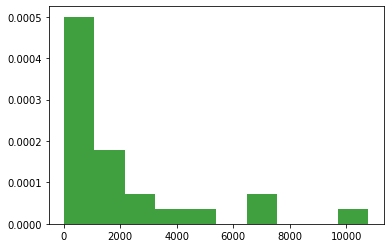

In [11]:
plt.hist(species.images_count, density=True, facecolor='g', alpha=0.75)
plt.show()

## Model quality discussion

So, all together, data contains 51 033 images of 15 587 individuals from 30 species. But few species have a good ratio. This will affect the prediction quality. Many species/individuals will be difficult to predict.

In [12]:
individuals_counts = df.drop(columns = ['image']).groupby(['species']).nunique().rename(columns = { 'individual_id': 'individuals_count'})
counts = pd.merge(species, individuals_counts, how = 'left', on = ['species'])
counts = counts.assign(ratio = counts.images_count / counts.individuals_count).sort_values(by = ['ratio'], ascending = False)
counts

,images_count,individuals_count,ratio
species,,,
false_killer_whale,3326,196,16.969388
minke_whale,1608,128,12.562500
bottlenose_dolphin,10781,904,11.925885
common_dolphin,347,38,9.131579
beluga,7443,1012,7.354743
gray_whale,1123,185,6.070270
killer_whale,2455,472,5.201271
brydes_whale,154,44,3.500000
pantropic_spotted_dolphin,145,44,3.295455


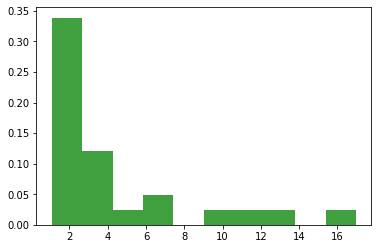

In [13]:
plt.hist(counts.ratio, density=True, facecolor='g', alpha=0.75)
plt.show()